In [6]:
# 피보나치 수열(메모이제이션 이용)
def fib_dp_mem(n):
    if (mem[n] == None):    # 풀리지 않은 경우 -> 계산하고 저장
        if n < 2:
            mem[n] = n      # 기반 상황: n <= 1
        else:               # 일반 상황: otherwise
            mem[n] = fib_dp_mem(n-1) + fib_dp_mem(n-2)
    return mem[n]

In [7]:
# 피보나치 수열(테이블화 이용)
def fib_dp_tab(n):
    f = [None] * (n+1)
    f[0] = 0
    f[1] = 1
    for i in range(2, n + 1):
        f[i] = f[i-1] + f[i-2]
    return f[n]

In [13]:
n = 8
print('동적계획( 메모이제이션 ): Fibonacci(%d) = '%n, fib_dp_mem(n))
mem = [None] * (n+1)
print('동적계획( 테이블화 ): Fibonacci(%d) = '%n, fib_dp_tab(n))

동적계획( 메모이제이션 ): Fibonacci(8) =  21
동적계획( 테이블화 ): Fibonacci(8) =  21


In [7]:
# 이항계수 C(n, k) 계산 함수(분할 정복 기법)
# 과제 : 메모이제이션 적용해보기
def bino_coef_dc(n, k):
    if (mem[n][k] == None):
        # k == 0 or k == n 일 경우 이항 계수는 항상 1
        if k == 0 or k == n:
            mem[n][k] = 1
        # 아닐 경우 이항 계수 정의
        else:
            mem[n][k] = bino_coef_dc(n-1, k-1) + bino_coef_dc(n-1, k)
    return mem[n][k]

n = 6
k = 3
# 2차원 배열로 None 값으로 초기화
mem = [[None for _ in range(k+1)] for _ in range(n+1)]

print("[Divide and Conquer] C(6,3) =", bino_coef_dc(n, k))

[Divide and Conquer] C(6,3) = 20


In [11]:
# 이항계수 C(n, k) 계산 함수(다이나믹 프로그래밍)
def bino_coef_dp(n, k):
    C = [[-1 for _ in range(k+1)] for _ in range(n+1)]

    for i in range(n+1):                          # botton-up 방향으로 진행: i:0~n
        for j in range(min(i, k) +1):             # j: 0~n
            if j == 0 or j == i:                  # 정의에 의해 (base case)
                C[i][j] = 1                       # C(n, 0) = C(n, n) = 1 -> 저장
            else:                                 
                C[i][j] = C[i-1][j-1] + C[i-1][j]
    return C[n][k]                                

In [17]:
print("[Dynamic Programming] C(6,3) =", bino_coef_dp(6, 3)) # 다이나믹 프로그래밍

[Dynamic Programming] C(6,3) = 20


In [18]:
# 최장 공통 부분순서 (순환 구조)
def lcs_recur(X, Y, m, n):                    # 순환 호출을 위해 길이 m, n이 필요
    if m == 0 or n == 0:                      # 기반 상황에 대한 처리
        return 0
    elif X[m-1] == Y[n-1]:                    # case 1: x_m == y_n
        return 1 + lcs_recur(X, Y, m-1, n-1)
    else:                                     # case 2
        return max(lcs_recur(X, Y, m, n-1), lcs_recur(X, Y, m-1, n))

In [21]:
# 최장 공통 부분순서 (다이나믹 프로그래밍)
def lcs_dp(X, Y):
    m = len(X)
    n = len(Y)
    L = [[None]*(n+1) for _ in range(m+1)]  # 테이블 생성

    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
    return L[m][n]

In [22]:
X = "GAME OVER"
Y = "HELLO WORLD"
print("X =", X)
print("Y =", Y)
print("LCS(분할 정복)", lcs_recur(X, Y, len(X), len(Y)))
print("LCS(동적 계획)", lcs_dp(X, Y))

X = GAME OVER
Y = HELLO WORLD
LCS(분할 정복) 4
4
LCS(동적 계획) 4


In [10]:
# Floyd의 최단 경로 탐색 알고리즘
import copy
def shortest_path_floyd(vertex, W):
    vsize = len(vertex)
    D = copy.deepcopy(W)
    for k in range(vsize):
        for i in range(vsize):
            for j in range(vsize):
                if (D[i][k] + D[k][j] < D[i][j]):
                    D[i][j] = D[i][k] + D[k][j]
        printD(D)

def printD(D):
    vsize = len(D)
    print("==================================")
    print(vertex)
    for i in range(vsize):
        for j in range(vsize):
            if (D[i][j] == INF) : print(" INF", end="")
            else: print("%4d "%D[i][j], end="")
        print("")
INF = 9999
vertex = ['--', 'A', 'B', 'C', 'E', 'F', 'G']
weight = [[0, 7, INF, INF, 3, 10, INF],
          [7, 0, 4, 10, 2, 6, INF],
          [INF, 4, 0, 2, INF, INF, INF],
          [INF, 10, 2, 0, 11, 9, 4],
          [3, 2, INF, 11, 0, 13, 5],
          [10, 6, INF, 9, 13, 0, INF],
          [INF, INF, INF, 4, 5, INF, 0]]
print("Shortest Path By Floyd's Algorithm")
shortest_path_floyd(vertex, weight)

Shortest Path By Floyd's Algorithm
['--', 'A', 'B', 'C', 'E', 'F', 'G']
   0    7  INF INF   3   10  INF
   7    0    4   10    2    6  INF
 INF   4    0    2  INF INF INF
 INF  10    2    0   11    9    4 
   3    2  INF  11    0   13    5 
  10    6  INF   9   13    0  INF
 INF INF INF   4    5  INF   0 
['--', 'A', 'B', 'C', 'E', 'F', 'G']
   0    7   11   17    3   10  INF
   7    0    4   10    2    6  INF
  11    4    0    2    6   10  INF
  17   10    2    0   11    9    4 
   3    2    6   11    0    8    5 
  10    6   10    9    8    0  INF
 INF INF INF   4    5  INF   0 
['--', 'A', 'B', 'C', 'E', 'F', 'G']
   0    7   11   13    3   10  INF
   7    0    4    6    2    6  INF
  11    4    0    2    6   10  INF
  13    6    2    0    8    9    4 
   3    2    6    8    0    8    5 
  10    6   10    9    8    0  INF
 INF INF INF   4    5  INF   0 
['--', 'A', 'B', 'C', 'E', 'F', 'G']
   0    7   11   13    3   10   17 
   7    0    4    6    2    6   10 
  11    4    0    2  

Shortest Path By Floyd's Algorithm
Original Weight Matrix:
      --     A     B     C     E     F     G
--     0     7  9999  9999     3    10  9999
A      7     0     4    10     2     6  9999
B   9999     4     0     2  9999  9999  9999
C   9999    10     2     0    11     9     4
E      3     2  9999    11     0    13     5
F     10     6  9999     9    13     0  9999
G   9999  9999  9999     4     5  9999     0
Shortest Path Weight Matrix:
    --  A   B   C  E   F   G
--   0  5   9  11  3  10   8
A    5  0   4   6  2   6   7
B    9  4   0   2  6  10   6
C   11  6   2   0  8   9   4
E    3  2   6   8  0   8   5
F   10  6  10   9  8   0  13
G    8  7   6   4  5  13   0


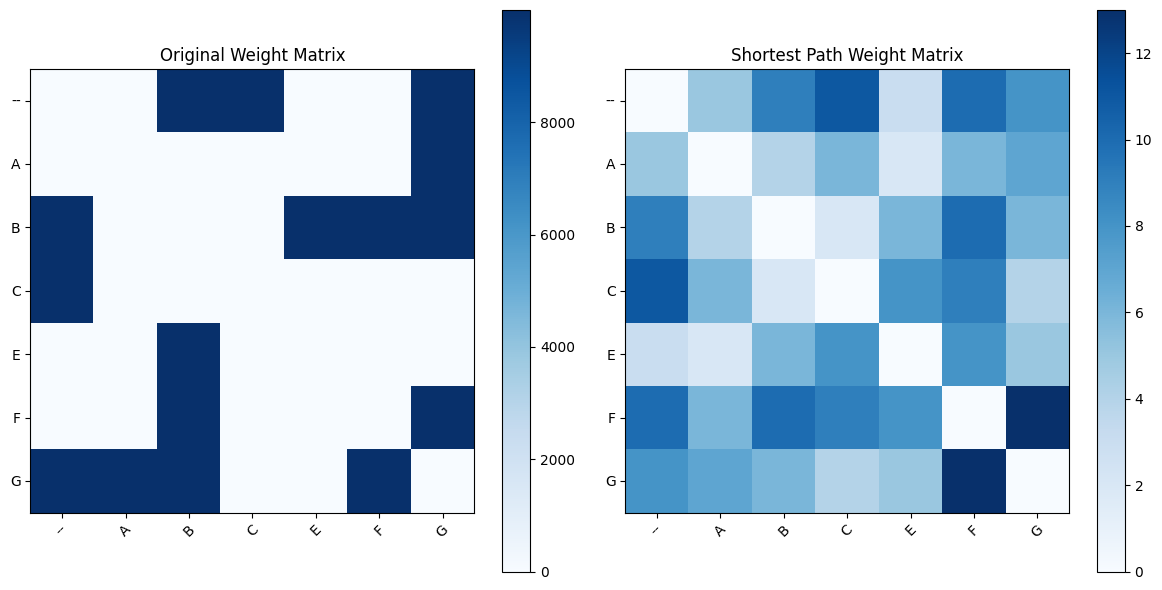

In [11]:
import copy
import pandas as pd
import matplotlib.pyplot as plt

def shortest_path_floyd(vertex, W):
    vsize = len(vertex)
    D = copy.deepcopy(W)
    
    df = pd.DataFrame(W, columns=vertex, index=vertex)
    print("==================================")
    print("Original Weight Matrix:")
    print(df)

    for k in range(vsize):
        for i in range(vsize):
            for j in range(vsize):
                if D[i][k] + D[k][j] < D[i][j]:
                    D[i][j] = D[i][k] + D[k][j]

    print("==================================")
    print("Shortest Path Weight Matrix:")
    print(pd.DataFrame(D, columns=vertex, index=vertex))

    # Plotting the original and updated weight matrices
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Weight Matrix")
    plt.imshow(df, cmap='Blues', interpolation='nearest')
    plt.xticks(range(vsize), vertex, rotation=45)
    plt.yticks(range(vsize), vertex)
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.title("Shortest Path Weight Matrix")
    plt.imshow(pd.DataFrame(D, columns=vertex, index=vertex), cmap='Blues', interpolation='nearest')
    plt.xticks(range(vsize), vertex, rotation=45)
    plt.yticks(range(vsize), vertex)
    plt.colorbar()

    plt.tight_layout()
    plt.show()

INF = 9999
vertex = ['--', 'A', 'B', 'C', 'E', 'F', 'G']
weight = [[0, 7, INF, INF, 3, 10, INF],
          [7, 0, 4, 10, 2, 6, INF],
          [INF, 4, 0, 2, INF, INF, INF],
          [INF, 10, 2, 0, 11, 9, 4],
          [3, 2, INF, 11, 0, 13, 5],
          [10, 6, INF, 9, 13, 0, INF],
          [INF, INF, INF, 4, 5, INF, 0]]

print("Shortest Path By Floyd's Algorithm")
shortest_path_floyd(vertex, weight)
